# Interpreting ASL with Neural Networks

We aim to train a convolutional neural network to recognise the ASL alphabet. We would then extend this project by creating a live motion capture system that translates the ASL alphabet in real time.

* 0 = A
* 1 = B
* 2 = C
* 3 = D
* 4 = E
* 5 = F
* 6 = G
* 7 = H
* 8 = I
* 9 = J
* 10 = K
* 11 = L
* 12 = M
* 13 = N
* 14 = O
* 15 = P
* 16 = Q
* 17 = R
* 18 = S
* 19 = T
* 20 = U
* 21 = V
* 22 = W
* 23 = X
* 24 = Y
* 25 = Z
* 26 = delete
* 27 = nothing
* 28 = space

# Get the data

In [2]:
from aitk.utils import gallery, array_to_image
from aitk.networks import Network

import tensorflow
#from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
# import asl csv
import numpy as np

In [3]:
# read in train data from scratch
# norm_data = []
data = []
# n = 200
# with open('/scratch/rvelasc1/asl_alphabet_train.csv') as my_file:
#     lines = [next(my_file) for x in range(n)]
fp = open('/scratch/rvelasc1/asl_alphabet_train.csv', "r")
for line in fp:
    img = line.strip().split(",")
    data.append([int(img[i]) for i in range(len(img))])
    # norm = [int(img[i])/255 for i in range(len(img))]
    # norm_data.append(norm)
fp.close()

In [4]:
train_x = np.array(data)
# reshape to grid
reshaped = np.array([train_x[i].reshape((200,200)) for i in range(np.size(train_x, 0))])

In [5]:
#read in train ans from scratch
train_y = []
fp = open('/scratch/rvelasc1/asl_alphabet_train_ans.txt', "r")
for line in fp:
# with open('/scratch/rvelasc1/asl_alphabet_train_ans.txt') as my_file:
    # train_y = [int(next(my_file).strip()) for x in range(n)]
    train_y.append(int(line.strip()))
fp.close()
train_y = np.array(train_y)

In [6]:
# get test files
test_data = []
fp = open('/scratch/rvelasc1/asl_alphabet_test.csv', "r")
for line in fp:
    img = line.strip().split(",")
    test_data.append([int(img[i]) for i in range(len(img))])
fp.close()
test_x = np.array(test_data)
# reshape to grid
reshaped_test = np.array([test_x[i].reshape((200,200)) for i in range(np.size(test_x, 0))])

In [7]:
# get test ans from scratch
test_y = []
fp = open('/scratch/rvelasc1/asl_alphabet_test_ans.txt', "r")
for line in fp:
    test_y.append(int(line.strip()))
fp.close()
test_y = np.array(test_y)

In [8]:
reshaped.shape

(87000, 200, 200)

In [9]:
#test_x.shape

In [10]:
images = [array_to_image(reshaped[i]) for i in range(10)]
bigger = [image.resize((100,100)) for image in images]

19,14,19,2,12
27,3,7,4,26

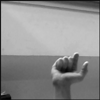
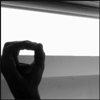
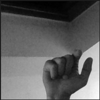
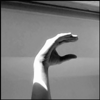
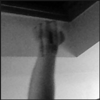
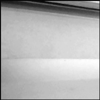
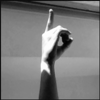
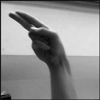
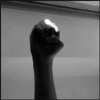
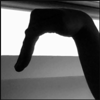

In [11]:
gallery(bigger, gallery_shape=(5,2), labels=train_y[:10])

In [12]:
train_y[:20]

array([19, 14, 19,  2, 12, 27,  3,  7,  4, 26,  9, 19,  1, 14, 25,  1,  4,
       28, 24, 23])

# Prepare the data for the network
* You may need to normalize the inputs so that they are in the range [0,1].
* You may need to convert the targets so that they are represented as one-hot vectors when you are doing categorization.

### Input data

In [13]:
min_input = train_x.min()
max_input = train_x.max()
print("range of input values is:", min_input, max_input)

range of input values is: 0 255


In [14]:
train_x_normalized = reshaped/255
train_x_normalized.shape

(87000, 200, 200)

In [15]:
test_x_normalized = reshaped_test/255

### Data sent into a Conv2D layer must have a depth
* This may require you to do a reshape command.
* For these black and white images there is only one channel of information.
* For color images there are typically 3 channels (Red, Green, Blue)

In [16]:
train_x_normalized = train_x_normalized.reshape(-1,200,200,1)
test_x_normalized = test_x_normalized.reshape(-1,200,200,1)

### Target data

In [17]:
num_categories = 29

In [18]:
train_y_category = to_categorical(train_y, num_categories)

In [19]:
test_y_category = to_categorical(test_y, num_categories)

In [20]:
train_y_category[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
train_y.shape

(87000,)

# Construct the model

This is just one possible configuration of layers to learn the data set.  You should experiment with the number of filters, the filter size, and the layers themselves. However, be sure to leave the output layer's activation function as `softmax`.

You should explicitly name each layer so that it will be easier to inspect them later. Use a clear naming convention.  For example the first convolution layer might be "conv1", the next "conv2", and so on.

In [22]:
neural_net = Sequential()
neural_net.add(Conv2D(32,(3,3),padding="same", name="conv1", activation="relu",input_shape=(200,200,1)))
neural_net.add(Conv2D(32,(3,3),padding="same", name="conv2", activation="relu"))
neural_net.add(MaxPooling2D(pool_size=(2,2),name="pool1"))
neural_net.add(Dropout(0.25))
neural_net.add(Conv2D(64,(3,3),padding="same", name="conv3", activation="relu"))
neural_net.add(Conv2D(64,(3,3),padding="same", name="conv4", activation="relu"))
neural_net.add(MaxPooling2D(pool_size=(2,2),name="pool2"))
neural_net.add(Dropout(0.25))
neural_net.add(Flatten(name="flatten"))
neural_net.add(Dense(50, name="hidden", activation='relu'))
neural_net.add(Dense(29, name="output",activation='softmax'))
neural_net.summary()

2022-12-09 17:26:36.547067: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 17:26:36.685172: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 17:26:36.685458: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 200, 200, 32)      320       
                                                                 
 conv2 (Conv2D)              (None, 200, 200, 32)      9248      
                                                                 
 pool1 (MaxPooling2D)        (None, 100, 100, 32)      0         
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 conv3 (Conv2D)              (None, 100, 100, 64)      18496     
                                                                 
 conv4 (Conv2D)              (None, 100, 100, 64)      36928     
                                                                 
 pool2 (MaxPooling2D)        (None, 50, 50, 64)        0

2022-12-09 17:26:36.687321: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 17:26:36.689497: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 17:26:36.689756: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 17:26:36.689989: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

# Compile the model

For categorical data like handwritten digits we typically use a loss function called `categorical_crossentropy` and should be used in conjunction with the `softmax` activation function at the output layer.  This interprets the outputs as representing probabilities and forces them to sum to 1.0.  Thus the output from the network will reflect how likely it considers a particular input to be a member of one of the output categories.

In [25]:
neural_net.compile(optimizer="Adam", loss="categorical_crossentropy",
                   metrics=['accuracy'])

# Create an aitk Network
This allows us to do more visualization of what is happening inside the network.

In [26]:
net = Network(neural_net)


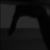
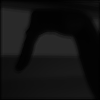
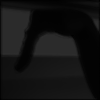
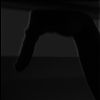
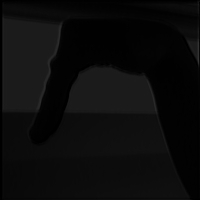
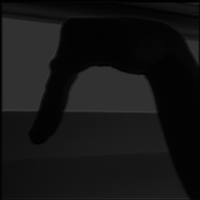
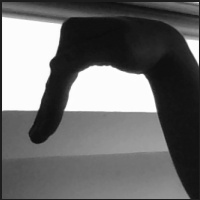

In [27]:
from time import sleep
for i in range(10):
    net.propagate(train_x_normalized[i])
    net.display(train_x_normalized[i])
    sleep(1.0)

# Train the model

In [ ]:
history = net.fit(train_x_normalized, 
                  train_y_category, 
                  verbose=1,
                  validation_data=(test_x_normalized, 
                                   test_y_category),
                  epochs=25)

# Inspect the feature maps


In [ ]:
test_image = 10 # change this to see a different image 

In [ ]:
from math import ceil
for layer in ["conv1", "conv2", "pool1", "conv3", "conv4", "pool2"]:
    data = [net.propagate_to(test_x_normalized[test_image], layer, channel=channel)
            for channel in range(8)]
    largest = max([sublist.max() for sublist in data])
    net.set_config_layer(layer, colormap=("gray", 0, ceil(largest)))

In [ ]:
images = [net.propagate_to(test_x_normalized[test_image], "conv1", "image", channel=channel)
         for channel in range(8)]
original = test_x_normalized[test_image]
bigger = [image.resize((200,200),resample=0) for image in images]
gallery([original] + bigger, labels="channel{index}", gallery_shape=(9,1))

In [ ]:
images = [net.propagate_to(test_x_normalized[test_image], "conv2", "image", channel=channel)
         for channel in range(8)]
original = test_x_normalized[test_image]
bigger = [image.resize((200,200),resample=0) for image in images]
gallery([original] + bigger, labels="channel{index}", gallery_shape=(9,1))

In [ ]:
images = [net.propagate_to(test_x_normalized[test_image], "pool1", "image", channel=channel)
         for channel in range(8)]
original = test_x_normalized[test_image]
bigger = [image.resize((200,200),resample=0) for image in images]
gallery([original] + bigger, labels="channel{index}", gallery_shape=(9,1))

In [ ]:
images = [net.propagate_to(test_x_normalized[test_image], "conv3", "image", channel=channel)
         for channel in range(8)]
original = test_x_normalized[test_image]
bigger = [image.resize((200,200),resample=0) for image in images]
gallery([original] + bigger, labels="channel{index}", gallery_shape=(9,1))

In [ ]:
images = [net.propagate_to(test_x_normalized[test_image], "conv4", "image", channel=channel)
         for channel in range(8)]
original = test_x_normalized[test_image]
bigger = [image.resize((200,200),resample=0) for image in images]
gallery([original] + bigger, labels="channel{index}", gallery_shape=(9,1))

In [ ]:
images = [net.propagate_to(test_x_normalized[test_image], "pool2", "image", channel=channel)
         for channel in range(8)]
original = test_x_normalized[test_image]
bigger = [image.resize((200,200),resample=0) for image in images]
gallery([original] + bigger, labels="channel{index}", gallery_shape=(9,1))

# Examine the results
Check which inputs the network is getting wrong. Recall that there are 10 thousand test images.

In [ ]:
from numpy import argmax
outputs = net.predict(test_x_normalized)
answers = [argmax(output) for output in outputs]
targets = [argmax(target) for target in test_y_category]

In [ ]:
incorrect = [i for i in range(len(answers)) if answers[i] != targets[i]]
len(incorrect)

In [ ]:
missed_target = [targets[i] for i in incorrect]
wrong_answer = [answers[i] for i in incorrect]

Let's find out which target classifications are most frequently missed.

In [ ]:
from collections import Counter

In [ ]:
t_ctr = Counter(missed_target)
t_ctr.most_common()

Let's find out which wrong classification is most frequently given.

In [ ]:
a_ctr = Counter(wrong_answer)
a_ctr.most_common()

In [ ]:
images = [array_to_image(test_x[index]) for index in incorrect]
label = [str(missed_target[i]) + "," + str(wrong_answer[i]) for i in range(len(wrong_answer))]
gallery(images, labels=label)